# VASP Geometry Optimisation Analysis

## Tips
KPOINTS file will work as long as same as one in examples folder.

## Useful syntax
### Making a pickle file
1. Navigate to Pdielec - Dev
2. Put files into testfiles folder
3. command is: python preader -program phonopy vasp \<path>\\\<filename> -pickle \<desired pickle filename>
4. object.\_\_dict\_\_ is a dictionary of all the attributes and their corresponding values of an object


## Code

### Required Libraries

In [2]:
import os
import dill as pickle
import matplotlib.pyplot as plt
import PDielec.UnitCell as UnitCell
import numpy as np

### Locate and read in pickle file(s)

In [41]:
# picklefile is the location of the pickled file generated using preader 
cwd = os.getcwd()
picklefile = cwd + '\\Python\\PDielec_Dev\\PDielec\\testfiles\\D2TestFiles\\Concatenated\\D2_cat.pickle'
# picklefile = cwd + '\\Python\\PDielec_Dev\\PDielec\\testfiles\\D2TestFiles\\Concatenated\\newpickletest5.pickle'
# This opens the pickled file generated by preader, 
# should read in multiple files if preader prcoessed multiple output files at once 
with open(picklefile,'rb') as f:
     readers = pickle.load(f)
        
OutputReader = str(type(readers).__name__)
vasp = "Vasp"
if not vasp in OutputReader:
    print('Wrong pickle file read in!')
else:
    print('All fine')
    

All fine


### Cell Dimensions

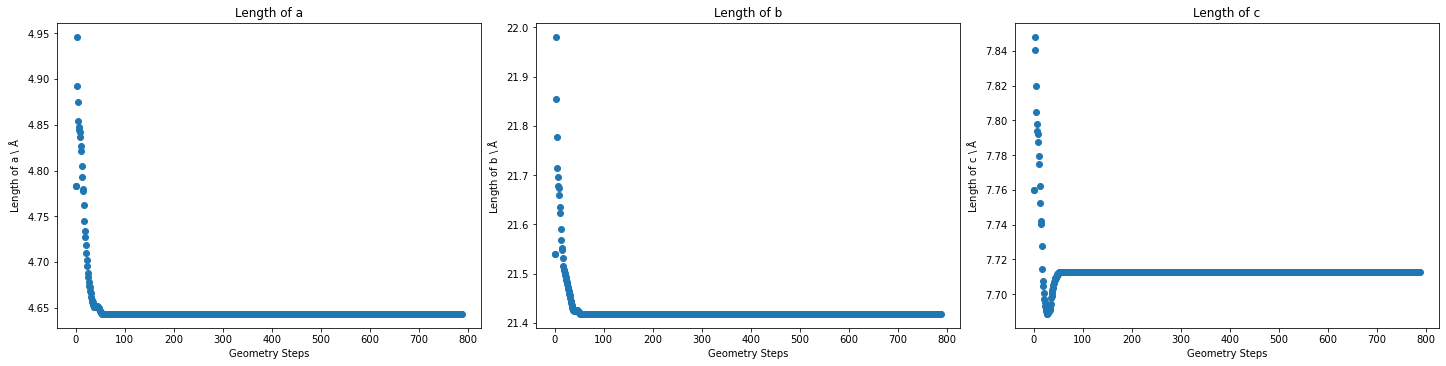

In [42]:
# Unit cell length plots
steps = list(range(0, ((len(readers.unit_cells)))))
# print(steps)
# This uses UnitCell tool in python to convert unit cells to abc 
alengths = []
blengths = []
clengths = []
alphas = []
betas = []
gammas = []
# These can be used to set which geometry step you want to start from (for forces and energy) or end on (cell properties)
# Each cell contains a parameter to change but can be controlled globally here if desired
cutoff = -1
start_from = 0

for i in range(0, len(readers.unit_cells)): 
    unitCell = readers.unit_cells[i]
    a,b,c,alpha,beta,gamma = unitCell.convert_unitcell_to_abc()
    alengths.append(a)
    blengths.append(b)
    clengths.append(c)
    alphas.append(alpha)
    betas.append(beta)
    gammas.append(gamma)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(steps[:cutoff], alengths[:cutoff])
ax1.title.set_text('Length of a')
ax1.set_xlabel('Geometry Steps')
ax1.set_ylabel('Length of a \ $\mathregular{\AA}$')
ax2.scatter(steps[:cutoff], blengths[:cutoff])
ax2.title.set_text('Length of b')
ax2.set_xlabel('Geometry Steps')
ax2.set_ylabel('Length of b \ $\mathregular{\AA}$')
ax3.scatter(steps[:cutoff], clengths[:cutoff])
ax3.title.set_text('Length of c')
ax3.set_xlabel('Geometry Steps')
ax3.set_ylabel('Length of c \ $\mathregular{\AA}$')

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()  

### Symmetry

Alpha Angle is Fixed by Symmetry
Gamma Angle is Fixed by Symmetry


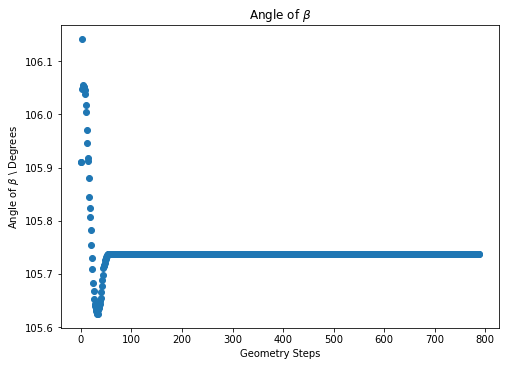

In [43]:
steps = list(range(0, (len(alphas))))
cutoff = cutoff

if np.var(alphas) + np.var(betas) + np.var(gammas) == 0:
    print('All Angles Fixed By Symmetry')

else:
    fig = plt.figure(figsize=(20, 5))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    
    if np.var(alphas) != 0:
        ax1.scatter(steps[:cutoff], alphas[:cutoff])
        ax1.title.set_text('Angle of ' r'$\alpha$')
        ax1.set_xlabel('Geometry Steps')
        ax1.set_ylabel('Angle of ' r'$\alpha$' ' \ Degrees')
    else:
        print('Alpha Angle is Fixed by Symmetry')
        fig.delaxes(ax1)
    if np.var(betas) != 0:    
        ax2.scatter(steps[:cutoff], betas[:cutoff])
        ax2.title.set_text('Angle of ' r'$\beta$')
        ax2.set_xlabel('Geometry Steps')
        ax2.set_ylabel('Angle of ' r'$\beta$' ' \ Degrees')
    else:
        print('Beta Angle is Fixed by Symmetry')
        fig.delaxes(ax2)
    
    if np.var(gammas) != 0:
        ax3.scatter(steps[:cutoff], gammas[:cutoff])
        ax3.title.set_text('Angle of ' r'$\gamma$')
        ax3.set_xlabel('Geometry Steps')
        ax3.set_ylabel('Angle of ' r'$\gamma$' ' \ Degrees')
    else:
        print('Gamma Angle is Fixed by Symmetry')
        fig.delaxes(ax3)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Volume and Pressure

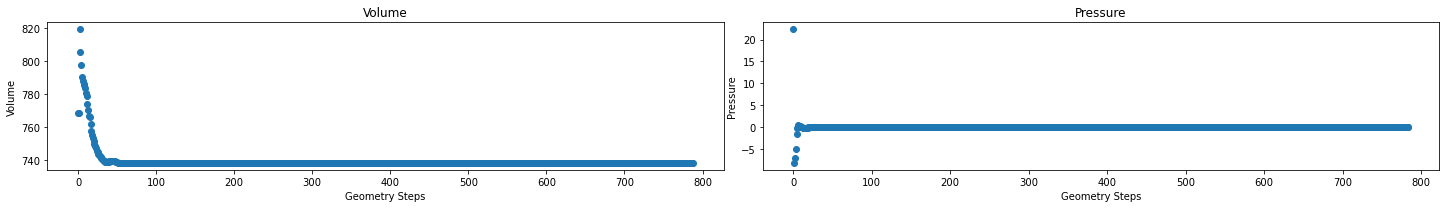

In [44]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
start_from = start_from
cutoff = cutoff

volumes = readers.volumes
pressures = readers.pressures
steps1 = list(range(0, ((len(volumes)))))
steps2 = list(range(0, ((len(pressures)))))

ax1.scatter(steps1[:cutoff], volumes[:cutoff])
ax1.title.set_text('Volume')
ax1.set_xlabel('Geometry Steps')
ax1.set_ylabel('Volume')
             
ax2.scatter(steps2[:cutoff], pressures[:cutoff])
ax2.title.set_text('Pressure')
ax2.set_xlabel('Geometry Steps')
ax2.set_ylabel('Pressure')

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Energies

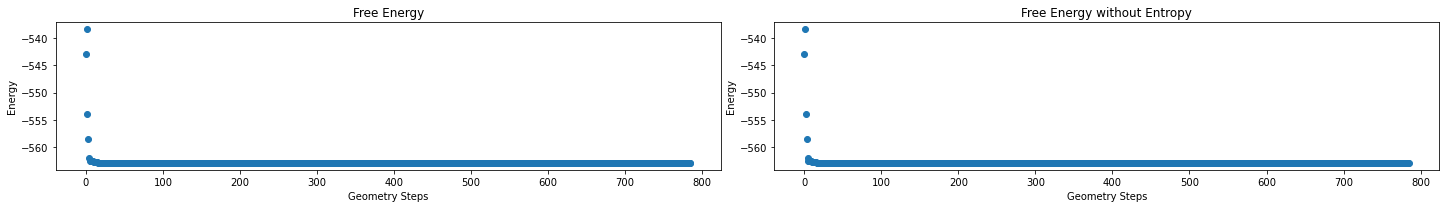

In [45]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
start_from = start_from

# plt.yscale('log')
energies = readers.final_free_energies
energies_noS = readers.final_energies_without_entropy
steps1 = list(range(0, ((len(energies)))))
steps2 = list(range(0, ((len(energies_noS)))))
ax1.scatter(steps1[start_from:], energies[start_from:])
ax1.title.set_text('Free Energy')
ax1.set_xlabel('Geometry Steps')
ax1.set_ylabel('Energy')

ax2.scatter(steps2[start_from:], energies_noS[start_from:])
ax2.title.set_text('Free Energy without Entropy')
ax2.set_xlabel('Geometry Steps')
ax2.set_ylabel('Energy')

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
# fig.set_size_inches(18.5, 10.5)
plt.show() 

### Forces

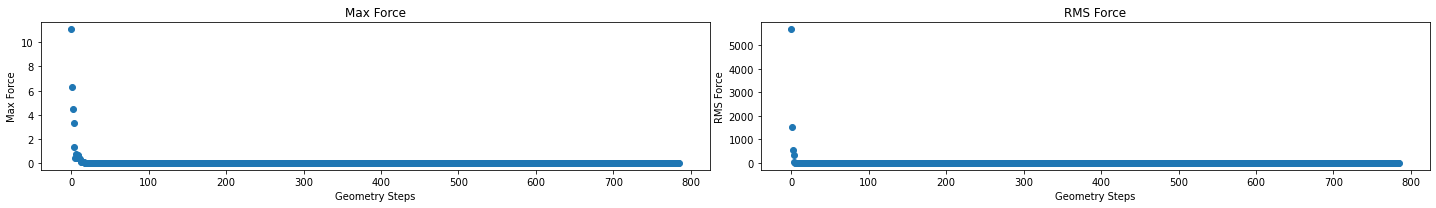

In [46]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
start_from = start_from

max_forces = readers.iterations['max_force']
rms_forces = readers.iterations['rms_force']
steps1 = list(range(0, ((len(max_forces)))))
steps2 = list(range(0, ((len(rms_forces)))))

ax1.scatter(steps1[start_from:], max_forces[start_from:])
ax1.title.set_text('Max Force')
ax1.set_xlabel('Geometry Steps')
ax1.set_ylabel('Max Force')

ax2.scatter(steps2[start_from:], rms_forces[start_from:])
ax2.title.set_text('RMS Force')
ax2.set_xlabel('Geometry Steps')
ax2.set_ylabel('RMS Force')

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show() 

### EDiff and FDiff

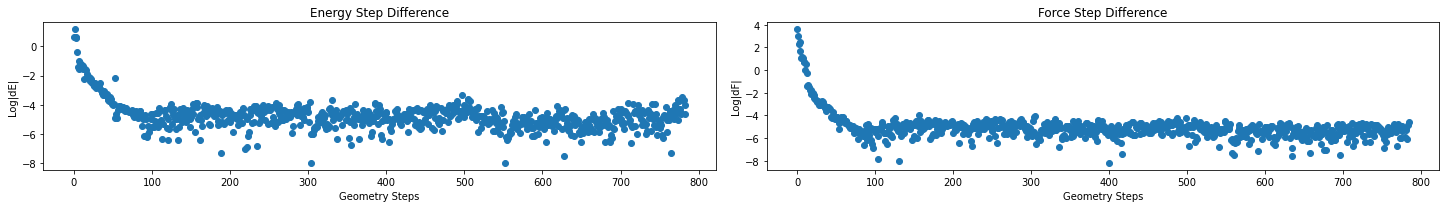

In [47]:
ediff = []
counter1 = 1
while counter1 < len(readers.final_free_energies):
    ediff.append(readers.final_free_energies[counter1] - readers.final_free_energies[counter1-1])
    counter1+=1
# print(ediff)
if i in ediff == 0:
    ediff.pop(0)
ediffm = [abs(ele) for ele in ediff]
# print(e)
# print(ediffm.index(0))
for i in ediffm:
    if i == 0:
        ediffm.pop(ediffm.index(0))
ediffl = np.log10(ediffm)
# print(ediffl)


# print(ediff)

fdiff = []
counter2 = 0
while counter2 < len(rms_forces):
    fdiff.append(rms_forces[counter2]- rms_forces[counter2-1])
    counter2+=1
fdiff.pop(0)
fdiffm = [abs(ele) for ele in fdiff]
for i in fdiffm:
    if i == 0:
        fdiffm.pop(fdiffm.index(0))
fdiffl = np.log10(fdiffm)
# print(fdiff)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
start_from = start_from

steps1 = list(range(0, ((len(ediffl)))))
steps2 = list(range(0, ((len(fdiffl)))))

ax1.scatter(steps1[start_from:], ediffl[start_from:])
ax1.title.set_text('Energy Step Difference')
ax1.set_xlabel('Geometry Steps')
ax1.set_ylabel('Log|dE|')

ax2.scatter(steps2[start_from:], fdiffl[start_from:])
ax2.title.set_text('Force Step Difference')
ax2.set_xlabel('Geometry Steps')
ax2.set_ylabel('Log|dF|')

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show() 